In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy import ndimage
from scipy.spatial import distance_matrix
from sklearn import datasets, manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [2]:
x1, y1 = make_blobs(n_samples=50, centers = [[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std= 0.9)

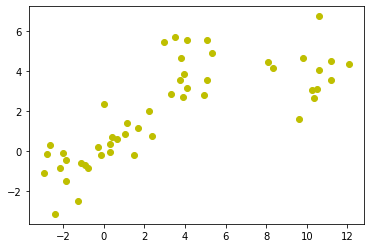

In [3]:
plt.scatter(x1[:,0], x1[:,1], marker = 'o', c='y')
plt.show()

In [4]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage='average')

In [5]:
agglom.fit(x1, y1) #y1 Not used, present here for API consistency by convention.

AgglomerativeClustering(linkage='average', n_clusters=3)

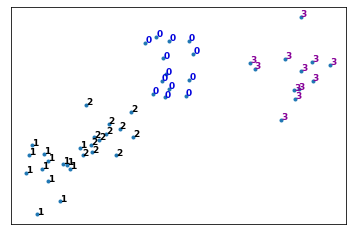

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(x1, axis=0), np.max(x1, axis=0)

# Get the average distance for X1.
x1 = (x1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(x1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(x1[i, 0], x1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(x1[:, 0], x1[:, 1], marker='.')
# Display the plot
plt.show()

In [15]:
dist_matrix = distance_matrix(x1, x1)
dist_matrix

array([[0.        , 0.77154896, 0.62727811, ..., 0.07674933, 0.25284998,
        0.18559061],
       [0.77154896, 0.        , 0.17107222, ..., 0.7036659 , 0.60628614,
        0.61847539],
       [0.62727811, 0.17107222, 0.        , ..., 0.565306  , 0.44112345,
        0.46172134],
       ...,
       [0.07674933, 0.7036659 , 0.565306  , ..., 0.        , 0.23523503,
        0.15723456],
       [0.25284998, 0.60628614, 0.44112345, ..., 0.23523503, 0.        ,
        0.07966851],
       [0.18559061, 0.61847539, 0.46172134, ..., 0.15723456, 0.07966851,
        0.        ]])

In [16]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-16-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


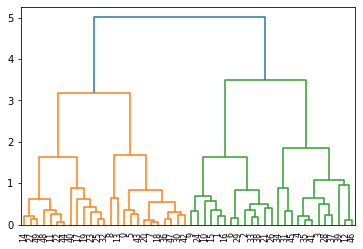

In [17]:
dendro = hierarchy.dendrogram(Z)

# HIERARCHIAL

In [18]:
df = pd.read_csv('CarsClust.csv')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [19]:
print(f'shape of dataset before cleaning={df.shape}')
df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] =df[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors ='coerce')
df= df.dropna()
df= df.reset_index(drop= True)
print(f'shape of dataset after cleaning={df.shape}')

shape of dataset before cleaning=(159, 16)
shape of dataset after cleaning=(117, 16)


In [20]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [21]:
feature_set = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']] 

In [22]:
from sklearn.preprocessing import MinMaxScaler
x = feature_set.values
feature_mtx = MinMaxScaler().fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## CLUSTERING Using Scipy

In [27]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros((leng, leng))
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
        
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [24]:
 feature_mtx.shape[0]

117

In [28]:
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-28-1465bc23637d>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


TypeError: barh() missing 2 required positional arguments: 'y' and 'width'

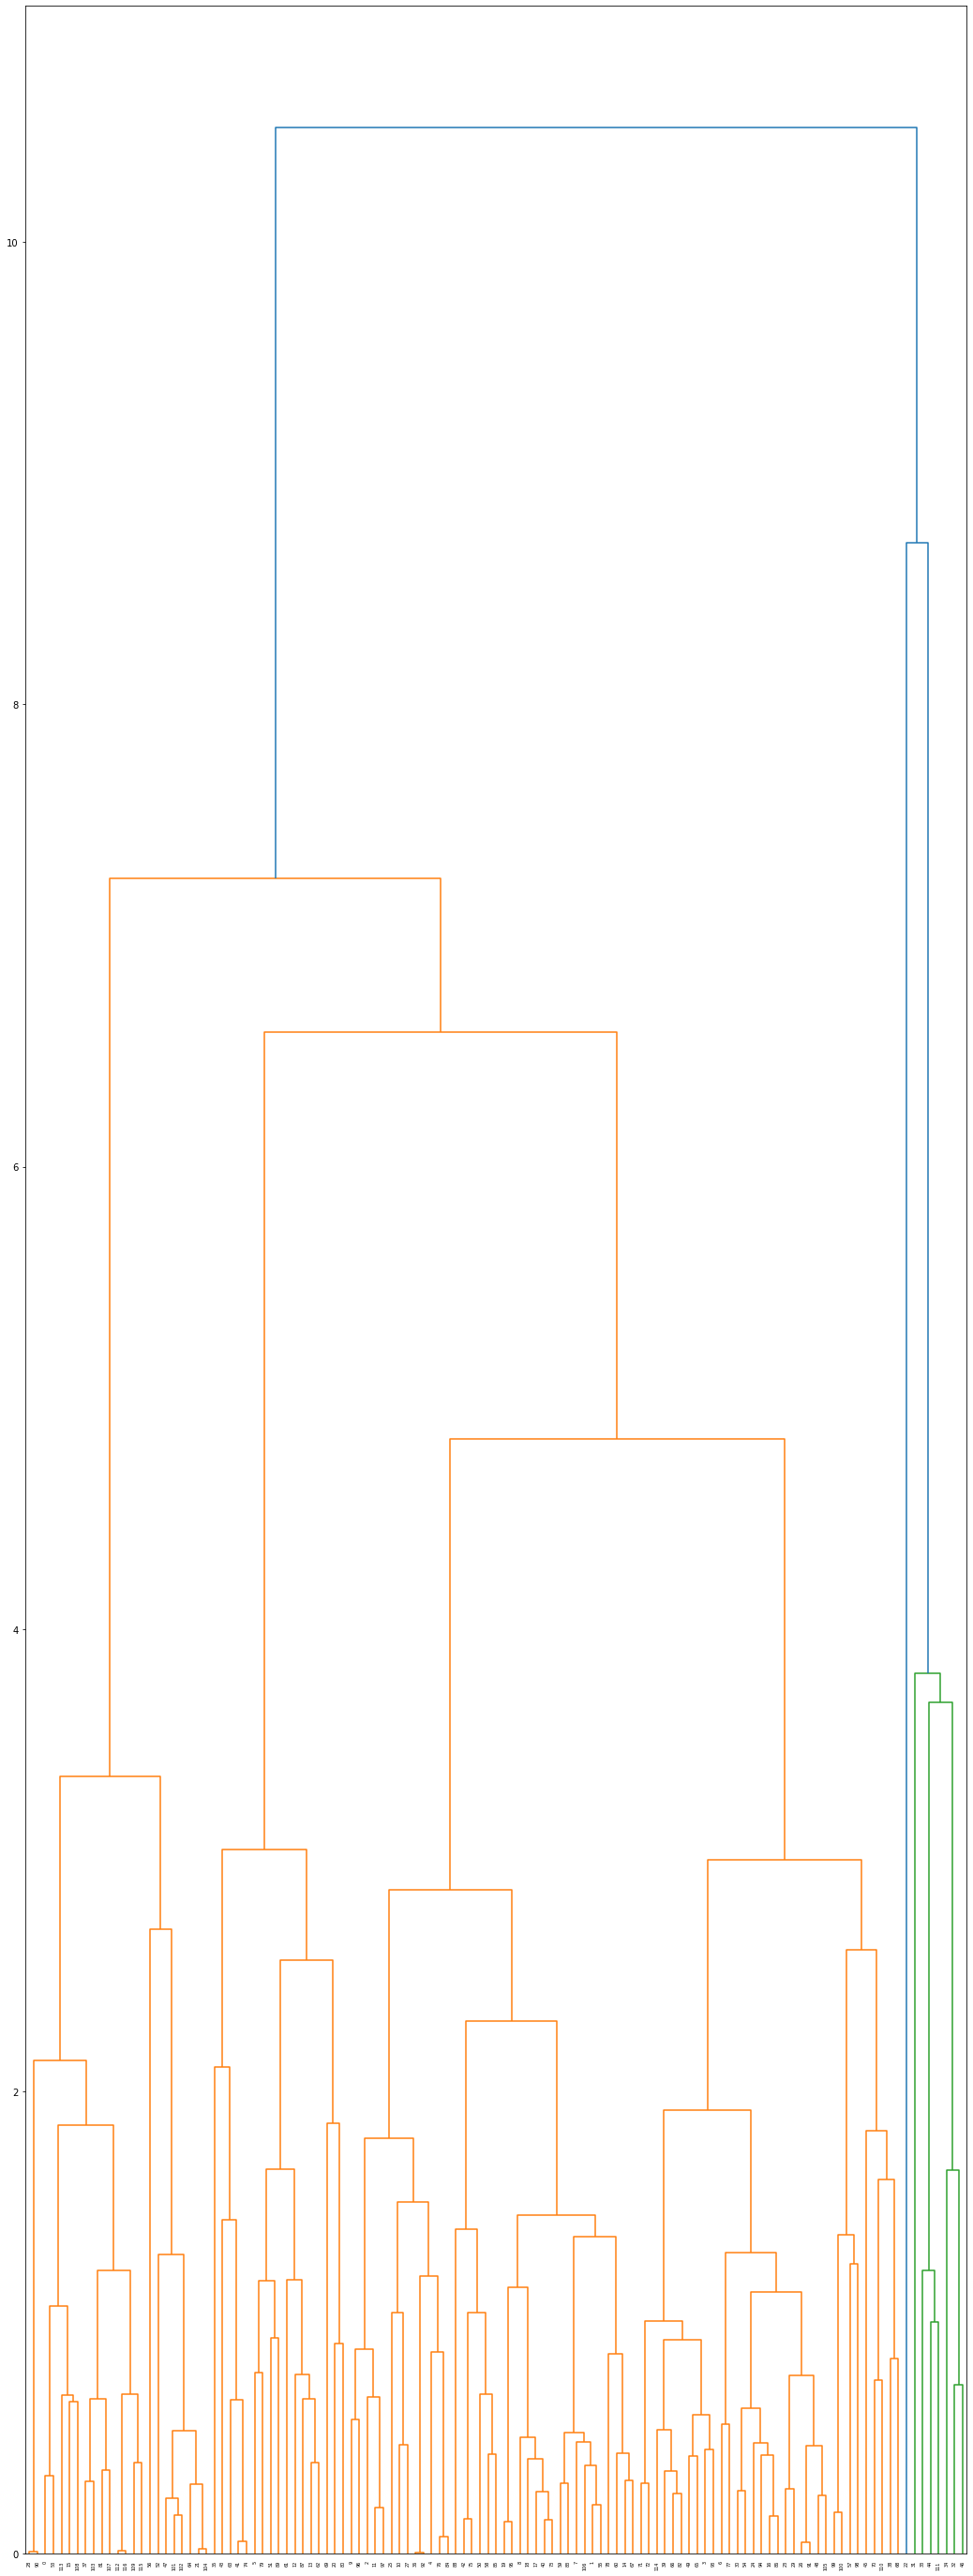

In [32]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z)
plt.show()